In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from kneed import DataGenerator, KneeLocator
!pip install kneed


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [7]:
# Read CSV
df = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv")
df.head(5)
# load dataset and show the first five sample


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# describe data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [12]:
# create new dataframe that consist only annual income and spending score
df2 = df.iloc[:,3:5];
df2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Before we analyze our data, we need to scale the data with standardization method

In [30]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df2)
standardized_df = pd.DataFrame(standardized_data, columns=df2.columns)
print(standardized_df)

     Annual Income (k$)  Spending Score (1-100)
0             -1.738999               -0.434801
1             -1.738999                1.195704
2             -1.700830               -1.715913
3             -1.700830                1.040418
4             -1.662660               -0.395980
..                  ...                     ...
195            2.268791                1.118061
196            2.497807               -0.861839
197            2.497807                0.923953
198            2.917671               -1.250054
199            2.917671                1.273347

[200 rows x 2 columns]


In [31]:
# get stastical information on the new dataset
standardized_df.describe()

,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

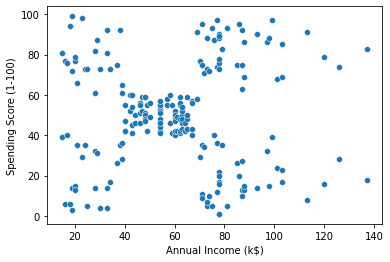

In [36]:
# Visualize the position 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df2,)
plt.show()

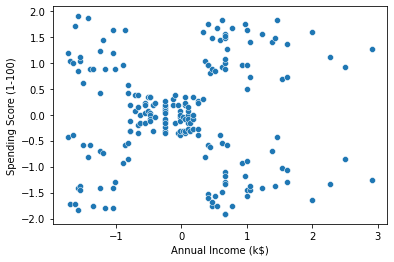

In [35]:
# Visualize the position using the original scale
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=standardized_df,)
plt.show()

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [98]:
# assign cluster with K-Means algorithm
n_clusters = 5
random_state = 42
max_iter = 300
kmeans = KMeans(init="random", n_clusters = 5,random_state = 42,max_iter = 300)
kmeans.fit(standardized_df)
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([-1.30751869,  1.05500302, -0.20091257, -1.32954532,  0.99158305]),
 array([-1.13696536, -1.28443907, -0.02645617,  1.13217788,  1.23950275]))

Visualize your result based on income and spending. You also can show the final position of the centroid.

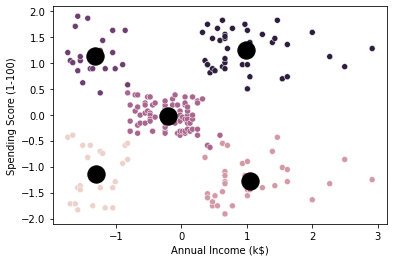

In [102]:
# visualize the result using scater chart
sns.scatterplot(data=standardized_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=kmeans.labels_, legend = None)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

In [115]:
sse = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(standardized_df)
    sse.append(k_means.inertia_)

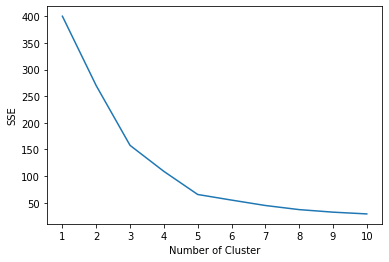

In [116]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Cluster')
plt.ylabel('SSE');

In [117]:
from kneed import KneeLocator
k = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
print('Elbow/Knee: ', k.elbow)

Elbow/Knee:  5
